<a href="https://colab.research.google.com/github/Fin-N1049/CPP_LAB/blob/main/questionSet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

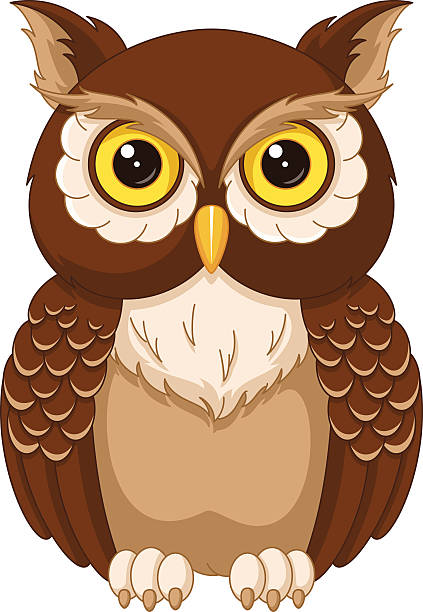

Image Shape: (612, 423, 3)
Image Size (Pixels x Channels): 776628
Image Datatype: uint8
Original Size: 51225 bytes
Compressed Size: 35118 bytes
Compression Ratio: 1.46


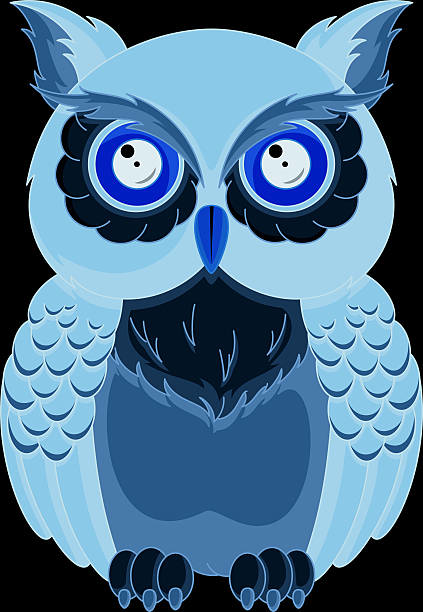

In [1]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Read the image
image_path = '/content/owl.jpg'
image = cv2.imread(image_path)

# a. Display the image
cv2_imshow(image)

# b. Get image information
print("Image Shape:", image.shape)
print("Image Size (Pixels x Channels):", image.size)
print("Image Datatype:", image.dtype)

# c. Find compression ratio
original_size = os.path.getsize(image_path)  # in bytes
compressed_path = '/content/compressed_image.jpg'
cv2.imwrite(compressed_path, image, [cv2.IMWRITE_JPEG_QUALITY, 50])
compressed_size = os.path.getsize(compressed_path)
compression_ratio = original_size / compressed_size
print(f"Original Size: {original_size} bytes")
print(f"Compressed Size: {compressed_size} bytes")
print(f"Compression Ratio: {compression_ratio:.2f}")

# d. Display negative of the image
negative = 255 - image
cv2_imshow(negative)


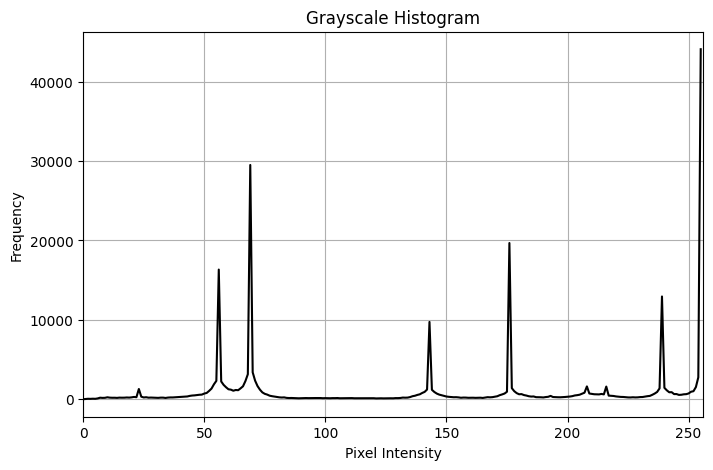

In [2]:
import cv2
import matplotlib.pyplot as plt
import os

# Load image using absolute path
image_path = r'/content/owl.jpg'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate histogram using OpenCV
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid(True)
plt.show()


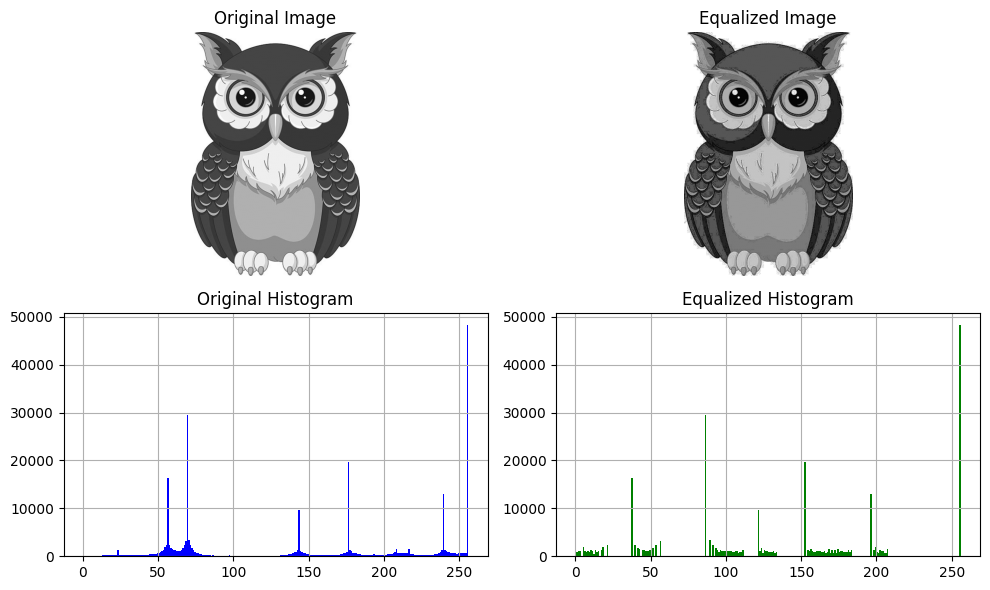

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = r'/content/owl.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized = cv2.equalizeHist(image)

# Plot original and equalized histograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Histogram")
plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.hist(equalized.ravel(), bins=256, range=[0, 256], color='green')
plt.grid(True)

plt.tight_layout()
plt.show()


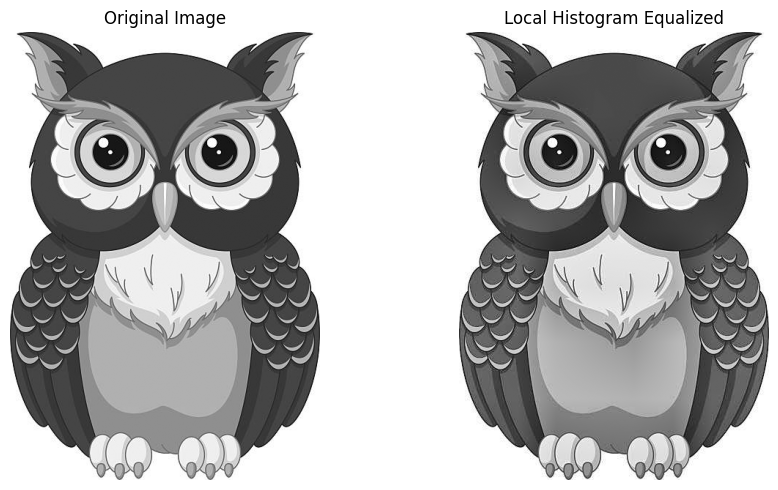

In [4]:
import cv2
import matplotlib.pyplot as plt

image_path = r'/content/owl.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create CLAHE object (clipLimit controls contrast, tileGridSize divides the image into tiles)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
local_eq = clahe.apply(image)

# Plot original vs local histogram equalized
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Local Histogram Equalized")
plt.imshow(local_eq, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


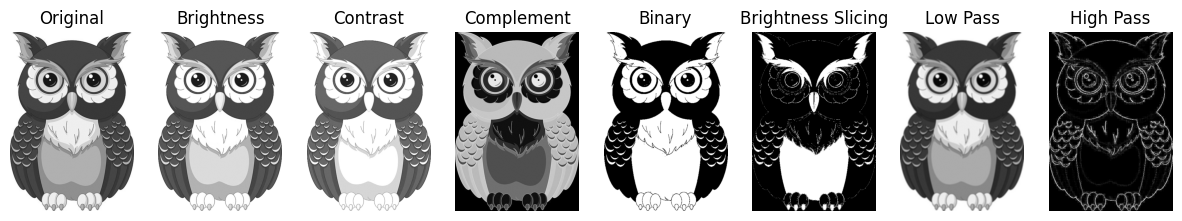

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Utility function for displaying images ----------
def show_images(images, titles, cmap='gray'):
    n = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# ---------- Image Enhancement Functions ----------

# a. Brightness Enhancement
def brightness_enhancement(img, beta=50):
    # beta adds brightness (positive = brighter, negative = darker)
    bright = cv2.convertScaleAbs(img, alpha=1, beta=beta)
    return bright

# b. Contrast Enhancement
def contrast_enhancement(img, alpha=1.5):
    # alpha > 1 increases contrast, 0 < alpha < 1 decreases
    contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=0)
    return contrast

# c. Complement of an Image (Negative)
def complement(img):
    comp = cv2.bitwise_not(img)
    return comp

# d. Bi-level or Binary Contrast Enhancement
def binary_contrast(img, threshold=128):
    _, binary = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return binary

# e. Brightness Slicing
def brightness_slicing(img, min_val=100, max_val=200):
    # Keep only pixels within [min_val, max_val]
    sliced = np.zeros_like(img)
    sliced[(img >= min_val) & (img <= max_val)] = 255
    return sliced

# f. Low Pass Filtering (Smoothing with averaging filter)
def low_pass_filter(img, ksize=5):
    low_pass = cv2.blur(img, (ksize, ksize))
    return low_pass

# g. High Pass Filtering (Enhancing edges)
def high_pass_filter(img):
    # Laplacian mask to highlight edges
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    high_pass = cv2.convertScaleAbs(laplacian)
    return high_pass

# ---------- Main ----------
if __name__ == "__main__":
    # Load grayscale image
    img = cv2.imread("/content/owl.jpg", cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: Image not found. Place 'sample.jpg' in the same folder.")
        exit()

    bright = brightness_enhancement(img)
    contrast = contrast_enhancement(img)
    comp = complement(img)
    binary = binary_contrast(img)
    sliced = brightness_slicing(img)
    low_pass = low_pass_filter(img)
    high_pass = high_pass_filter(img)

    # Display results
    show_images(
        [img, bright, contrast, comp, binary, sliced, low_pass, high_pass],
        ["Original", "Brightness", "Contrast", "Complement", "Binary", "Brightness Slicing", "Low Pass", "High Pass"]
    )


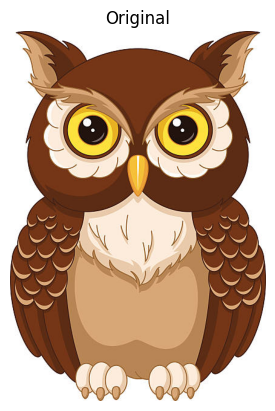

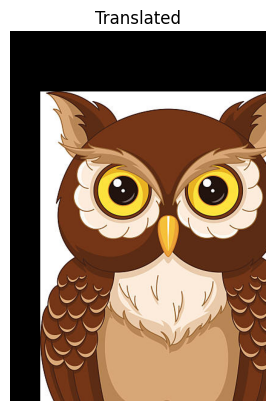

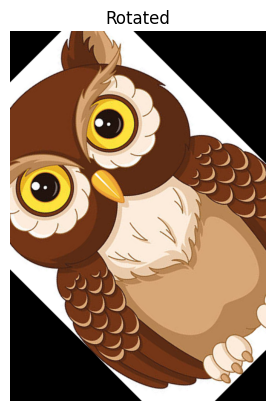

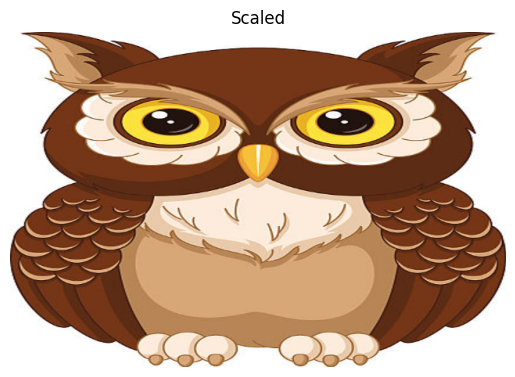

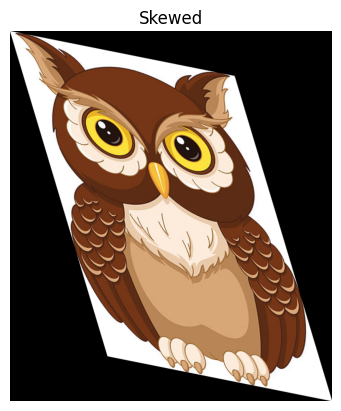

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Utility to show images ----------
def show(title, image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# ---------- Geometric Transformations ----------

# a. Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])  # Translation matrix
    return cv2.warpAffine(image, M, (cols, rows))

# b. Rotation
def rotate_image(image, angle, scale=1.0):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale)
    return cv2.warpAffine(image, M, (cols, rows))

# c. Scaling
def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# d. Skewing (Shear)
def skew_image(image, shear_factor_x=0.2, shear_factor_y=0.0):
    rows, cols = image.shape[:2]
    M = np.float32([[1, shear_factor_x, 0],
                    [shear_factor_y, 1, 0]])
    new_cols = int(cols + abs(shear_factor_x * rows))
    new_rows = int(rows + abs(shear_factor_y * cols))
    return cv2.warpAffine(image, M, (new_cols, new_rows))

# ---------- Main ----------
if __name__ == "__main__":
    # Load test image
    image = cv2.imread("/content/owl.jpg")  # Replace with your image path

    if image is None:
        raise FileNotFoundError("Image not found. Place 'test.jpg' in working directory.")

    # Apply transformations
    translated = translate_image(image, tx=50, ty=100)
    rotated = rotate_image(image, angle=45)
    scaled = scale_image(image, fx=1.5, fy=0.7)
    skewed = skew_image(image, shear_factor_x=0.3, shear_factor_y=0.2)

    # Show results
    show("Original", image)
    show("Translated", translated)
    show("Rotated", rotated)
    show("Scaled", scaled)
    show("Skewed", skewed)
